In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
conn = engine.connect()

In [6]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)


In [10]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [11]:
# Create our session (link) from Python to the DB
session = Session(engine)


# Exploratory Climate Analysis

In [20]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

latest_date = (session.query(Measurement.date)
                     .order_by(Measurement.date.desc())
                     .first())

latest_date = list(np.ravel(latest_date))[0]

latest_date = dt.datetime.strptime(latest_date, '%Y-%m-%d')

print(latest_date)


2017-08-23 00:00:00


In [28]:
# Calculate the date 1 year ago from the last data point in the database

latest_year = int(dt.datetime.strftime(latest_date, '%Y'))
latest_month = int(dt.datetime.strftime(latest_date, '%m'))
latest_day = int(dt.datetime.strftime(latest_date, '%d'))

year_prior = dt.date(latest_year, latest_month, latest_day) - dt.timedelta(days=365)
year_prior

datetime.date(2016, 8, 23)

In [27]:
# Perform a query to retrieve the data and precipitation scores

prcp_data = (session.query(Measurement.date, Measurement.prcp)
                  .filter(Measurement.date > year_prior)
                  .order_by(Measurement.date)
                  .all())

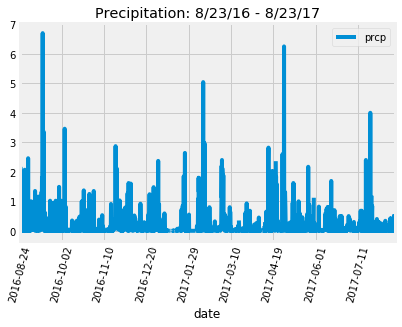

In [34]:
# Save the query results as a Pandas DataFrame and set the index to the date column
prcp_df = pd.DataFrame(prcp_data)
prcp_df = prcp_df.set_index('date')

# Sort the dataframe by date
prcp_df = prcp_df.sort_index(ascending=True)

# Use Pandas Plotting with Matplotlib to plot the data
prcp_df.plot(title="Precipitation: 8/23/16 - 8/23/17", rot=75)

In [ ]:
# Use Pandas to calcualte the summary statistics for the precipitation data


In [38]:
# Design a query to show how many stations are available in this dataset?
avail_stations = session.query(Station).count()
avail_stations

9

In [39]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
active_stations = (session.query(Measurement.station, func.count(Measurement.station))
                        .group_by(Measurement.station)
                        .order_by(func.count(Measurement.station).desc())
                        .all())
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [42]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?

station_id = active_stations[0][0]

highest_temp = (session.query(Measurement.tobs)
                      .filter(Measurement.station == station_id)
                      .order_by(Measurement.tobs.desc())
                      .first())
highest_temp = highest_temp[0]
print(f"The highest temperature recorded there is {highest_temp} degrees.")

lowest_temp = (session.query(Measurement.tobs)
                     .filter(Measurement.station == station_id)
                     .order_by(Measurement.tobs.asc())
                     .first())
lowest_temp = lowest_temp[0]
print(f"The lowest temperature recorded there is {lowest_temp} degrees.")

avg_temp = (session.query(func.avg(Measurement.tobs))
                  .filter(Measurement.station == station_id))
avg_temp = '{0:.3}'.format(avg_temp[0][0])
print(f"The average temperature recorded there is {avg_temp} degrees.")


The highest temperature recorded there is 85.0 degrees.
The lowest temperature recorded there is 54.0 degrees.
The average temperature recorded there is 71.7 degrees.


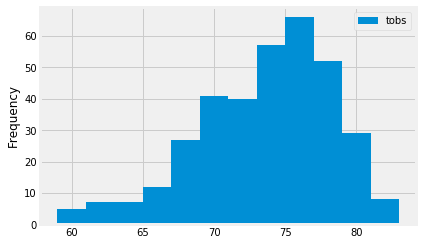

In [44]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

temp_data = (session.query(Measurement.date, Measurement.tobs)
                   .filter(Measurement.date > year_prior)
                   .filter(Measurement.station == station_id)
                   .order_by(Measurement.date)
                   .all())

temp_df = pd.DataFrame(temp_data)
temp_df = temp_df.set_index('date')
temp_df = temp_df.sort_index(ascending=True)
temp_df

temp_df.plot(kind='hist', bins=12)
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
